Copyright ©2021-2022. Stephen Rigden.
This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

# Heart Rate - Box and Boxen Plots

Change History
11/15/2021 Started

In [1]:
import pandas
from pathlib import Path
from matplotlib import pyplot
import seaborn
seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [2]:
project_path = Path.cwd().parent.parent
heart_df_pickle = project_path / 'data' / 'processed' / 'heart_df.pickle'

### Get the heart pickle and analyse its structure

In [3]:
ds = pandas.read_pickle(heart_df_pickle)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188620 entries, 5 to 188624
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        188620 non-null  datetime64[ns]
 1   heart rate  188620 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 MB


#### Converting an integer Series type to a string Series type
See the pandas user guide: [Working with text data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

In [4]:
dsyw = ds.loc[:, :]
year = dsyw.date.dt.isocalendar().year.astype('string')
week = dsyw.date.dt.isocalendar().week.astype('string')
dsyw['year_week'] = year + '_' + week
dsyw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188620 entries, 5 to 188624
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        188620 non-null  datetime64[ns]
 1   heart rate  188620 non-null  float64       
 2   year_week   188620 non-null  string        
dtypes: datetime64[ns](1), float64(1), string(1)
memory usage: 5.8 MB


In [5]:
dsyw['year_week'].unique()

<StringArray>
['2020_14', '2020_15', '2020_16', '2020_17', '2020_18', '2020_19', '2020_20',
 '2020_21', '2020_22', '2020_23', '2020_24', '2020_25', '2020_26', '2020_27',
 '2020_28', '2020_29', '2020_30', '2020_31', '2020_32', '2020_33', '2020_34',
 '2020_35', '2020_36', '2020_37', '2020_38', '2020_39', '2020_40', '2020_41',
 '2020_42', '2020_43', '2020_44', '2020_45', '2020_46', '2020_47', '2020_48',
 '2020_49', '2020_50', '2020_51', '2020_52', '2020_53',  '2021_1',  '2021_2',
  '2021_3',  '2021_4',  '2021_5',  '2021_6',  '2021_7',  '2021_8',  '2021_9',
 '2021_10', '2021_11', '2021_12', '2021_13', '2021_14', '2021_15', '2021_16',
 '2021_17', '2021_18', '2021_19', '2021_20', '2021_21', '2021_22', '2021_23',
 '2021_24', '2021_25', '2021_26', '2021_27', '2021_28', '2021_29', '2021_30',
 '2021_31', '2021_32', '2021_33', '2021_34', '2021_35', '2021_36', '2021_37',
 '2021_38', '2021_39', '2021_40', '2021_41', '2021_42', '2021_43']
Length: 83, dtype: string

<AxesSubplot:xlabel='year_week', ylabel='heart rate'>

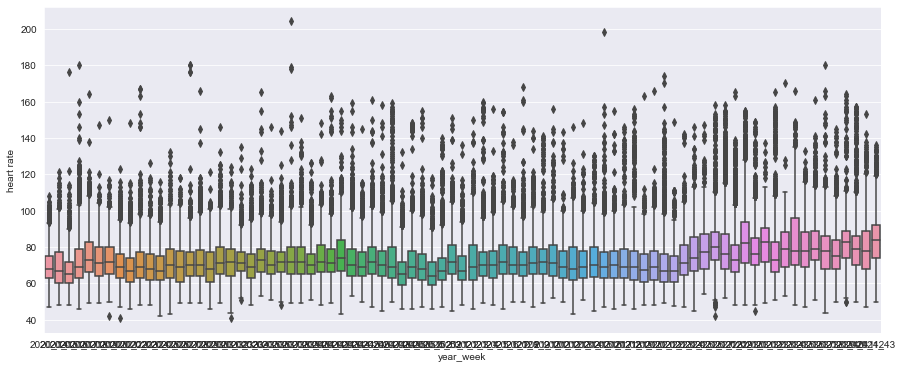

In [6]:
fig, axes = pyplot.subplots(figsize=(15, 6))
seaborn.boxplot(data=dsyw,
                x='year_week', y='heart rate',
                ax=axes)

In [7]:
y = (ds.date.dt.isocalendar().year - 2020) * 52
y.unique()

<IntegerArray>
[0, 52]
Length: 2, dtype: UInt32

In [8]:
dsyw = ds.loc[:, :]
year = dsyw.date.dt.isocalendar().year
week = dsyw.date.dt.isocalendar().week // 8 * 8
dsyw['year_week'] = year.astype('string') + '_' + week.astype('string')
dsyw.head()

,date,heart rate,year_week
5,2020-03-30 20:11:49,67.0,2020_8
6,2020-03-30 20:16:17,67.0,2020_8
7,2020-03-30 20:21:09,61.0,2020_8
8,2020-03-30 20:21:13,64.0,2020_8
9,2020-03-30 20:21:18,63.0,2020_8


<AxesSubplot:xlabel='year_week', ylabel='heart rate'>

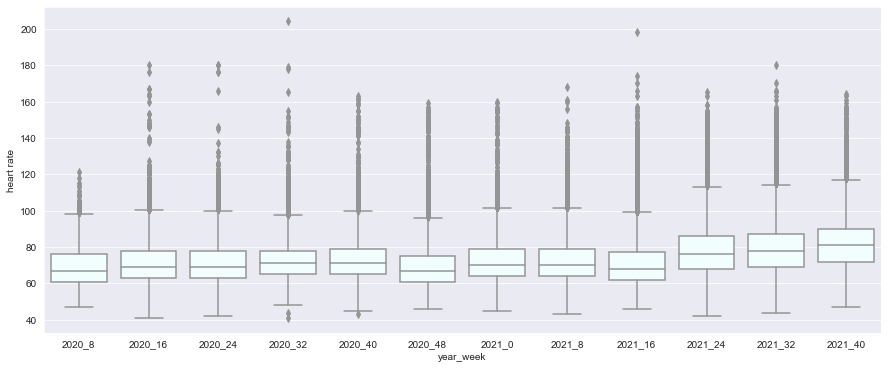

In [9]:
fig, axes = pyplot.subplots(figsize=(15, 6))
seaborn.boxplot(data=dsyw,
                x='year_week', y='heart rate',
                ax=axes, palette=['azure'])

### Boxenplot

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. For a more extensive explanation, you can read the paper that introduced the plot:
https://vita.had.co.nz/papers/letter-value-plot.html

<AxesSubplot:xlabel='year_week', ylabel='heart rate'>

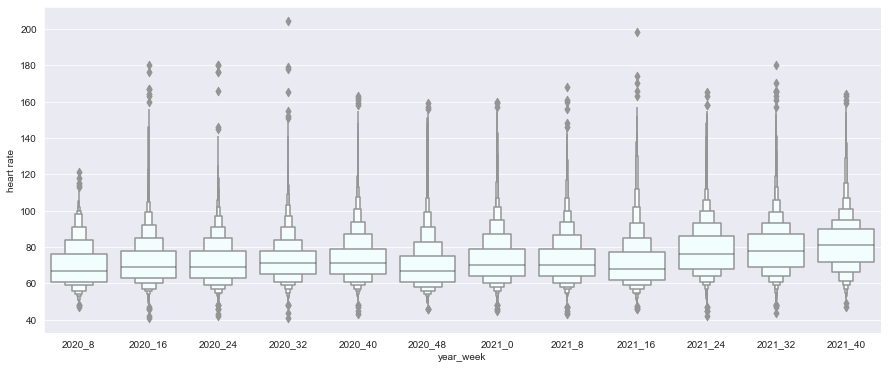

In [10]:
fig, axes = pyplot.subplots(figsize=(15, 6))
seaborn.boxenplot(data=dsyw,
                x='year_week', y='heart rate',
                ax=axes, palette=['azure'])